# Introducing image processing and scikit image

## Edges

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [3]:
grapefruit = plt.imread('data/toronjas.jpg')

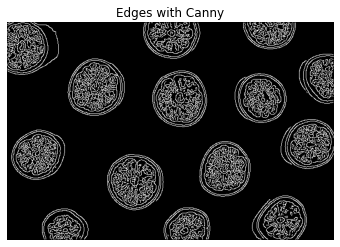

In [4]:
# Import the canny edge detector 
from skimage.feature import canny
from skimage.color import rgb2gray

# Convert image to grayscale
grapefruit = rgb2gray(grapefruit)

# Apply canny edge detector
canny_edges = canny(grapefruit)

# Show resulting image
show_image(canny_edges, "Edges with Canny")

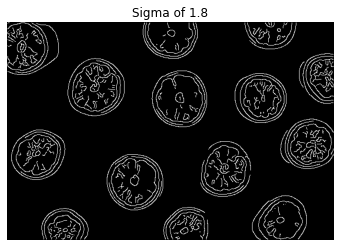

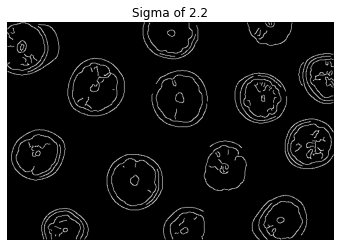

In [5]:
# Apply canny edge detector with a sigma of 1.8
edges_1_8 = canny(grapefruit, sigma=1.8)

# Apply canny edge detector with a sigma of 2.2
edges_2_2 = canny(grapefruit, sigma=2.2)

# Show resulting images
show_image(edges_1_8, "Sigma of 1.8")
show_image(edges_2_2, "Sigma of 2.2")

## Corner Detection

In [6]:
def show_image_with_corners(image, coords, title="Corners detected"):
    plt.imshow(image, interpolation='nearest', cmap='gray')
    plt.title(title)
    plt.plot(coords[:, 1], coords[:, 0],
            '+r', markersize=15)
    plt.axis('off')
    plt.show()

In [7]:
building_image = plt.imread('data/corners_building_top.jpg')

/home/jacob/Code/cs-notes/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Until version 0.16, threshold_rel was set to 0.1 by default. Starting from version 0.16, the default value is set to None. Until version 0.18, a None value corresponds to a threshold value of 0.1. The default behavior will match skimage.feature.peak_local_max. To avoid this warning, set threshold_rel=0.
  # Remove the CWD from sys.path while we load stuff.


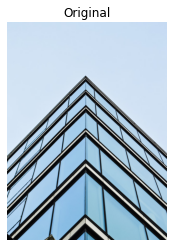

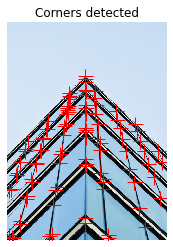

In [8]:
from skimage.feature import corner_harris, corner_peaks

# Convert image from RGB-3 to grayscale
building_image_gray = rgb2gray(building_image)

# Apply the detector  to measure the possible corners
measure_image = corner_harris(building_image_gray)

# Find the peaks of the corners using the Harris detector
coords = corner_peaks(measure_image, min_distance=2)

# Show original and resulting image with corners detected
show_image(building_image, "Original")
show_image_with_corners(building_image, coords)

/home/jacob/Code/cs-notes/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Until version 0.16, threshold_rel was set to 0.1 by default. Starting from version 0.16, the default value is set to None. Until version 0.18, a None value corresponds to a threshold value of 0.1. The default behavior will match skimage.feature.peak_local_max. To avoid this warning, set threshold_rel=0.
  
/home/jacob/Code/cs-notes/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Until version 0.16, threshold_rel was set to 0.1 by default. Starting from version 0.16, the default value is set to None. Until version 0.18, a None value corresponds to a threshold value of 0.1. The default behavior will match skimage.feature.peak_local_max. To avoid this warning, set threshold_rel=0.
  


With a min_distance set to 2, we detect a total 98 corners in the image.
With a min_distance set to 40, we detect a total 36 corners in the image.


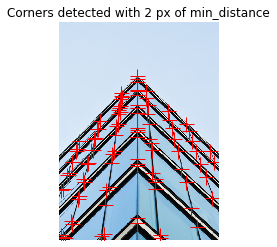

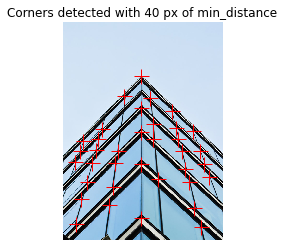

In [9]:
# Find the peaks with a min distance of 2 pixels
coords_w_min_2 = corner_peaks(measure_image, min_distance=2)
print("With a min_distance set to 2, we detect a total", len(coords_w_min_2), "corners in the image.")

# Find the peaks with a min distance of 40 pixels
coords_w_min_40 = corner_peaks(measure_image, min_distance=40)
print("With a min_distance set to 40, we detect a total", len(coords_w_min_40), "corners in the image.")

# Show original and resulting image with corners detected
show_image_with_corners(building_image, coords_w_min_2, "Corners detected with 2 px of min_distance")
show_image_with_corners(building_image, coords_w_min_40, "Corners detected with 40 px of min_distance")

## Face Detection

In [10]:
from matplotlib import patches

In [11]:
def show_detected_face(result, detected, title="Face image"):
    plt.imshow(result)
    # get the current Axes instance on the current figure 
    # matching the given keyword args, or create one.
    img_desc = plt.gca() 
    plt.set_cmap('gray')
    plt.title(title)
    plt.axis('off')
    for patch in detected:
        img_desc.add_patch(
            patches.Rectangle(
                (patch['c'], patch['r']),
                patch['width'],
                patch['height'],
                fill=False, color='r', linewidth=2)
        )
    plt.show()

In [12]:
night_image = plt.imread('data/face_det3.jpg')

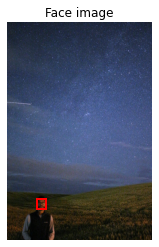

In [13]:
from skimage.feature import Cascade
from skimage import data

# Load the trained file from data
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade
detector = Cascade(trained_file)

# Detect faces with min and max size of searching window
detected = detector.detect_multi_scale(img = night_image,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10, 10),
                                       max_size=(200, 200))

# Show the detected faces
show_detected_face(night_image, detected)

In [14]:
friends_image = plt.imread('data/face_det_friends22.jpg')

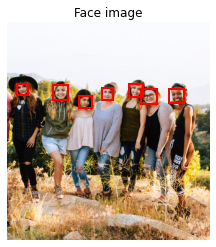

In [15]:
# Load the trained file from data
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade
detector = Cascade(trained_file)

# Detect faces with scale factor to 1.2 and step ratio to 1
detected = detector.detect_multi_scale(img=friends_image,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10, 10),
                                       max_size=(200, 200))
# Show the detected faces
show_detected_face(friends_image, detected)

In [16]:
profile_image = plt.imread('data/face_det9.jpg')

In [17]:
from skimage.segmentation import slic
from skimage.color import label2rgb

/home/jacob/Code/cs-notes/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  
/home/jacob/Code/cs-notes/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  """


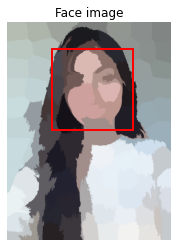

In [18]:
# Obtain the segmentation with default 100 regions
segments = slic(profile_image)

# Obtain segmented image using label2rgb
segmented_image = label2rgb(segments, profile_image, kind='avg')

# Detect the faces with multi scale method
detected = detector.detect_multi_scale(img=segmented_image, 
                                       scale_factor=1.2, 
                                       step_ratio=1, 
                                       min_size=(10, 10), max_size=(1000, 1000))

# Show the detected faces
show_detected_face(segmented_image, detected)

## Real World Applications

### Privacy Protection

In [19]:
group_image = plt.imread('data/face_det25.jpg')
group_image = group_image.copy()

In [20]:
from skimage.filters import gaussian

In [21]:
def getFaceRectangle(d):
    ''' Extracts the face rectangle from the image using the
    coordinates of the detected.'''
    # X and Y starting points of the face rectangle
    x, y = d['r'], d['c']
    # The width and height of the face rectangle
    width, height = d['r'] + d['width'], d['c'] + d['height']
    # Extract the detected face
    face = group_image[x:width, y:height]
    return face

In [22]:
def mergeBlurryFace(original, gaussian_image):
    # X and Y starting points of the face rectangle
    x, y = d['r'], d['c']
    # The width and height of the face rectangle
    width, height = d['r'] + d['width'], d['c'] + d['height']
    original[x:width, y:height] = gaussian_image
    return original

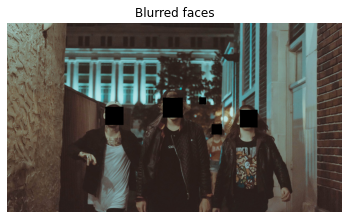

In [23]:
# Detect the faces
detected = detector.detect_multi_scale(img=group_image, 
                                       scale_factor=1.2, step_ratio=1, 
                                       min_size=(10,10), max_size=(100, 100))

# For each detected face
for d in detected:  
    # Obtain the face rectangle from detected coordinates
    face = getFaceRectangle(d)
    
    # Apply gaussian filter to extracted face
    blurred_face = gaussian(face, multichannel=True, sigma = 8)
    
    # Merge this blurry face to our final image and show it
    resulting_image = mergeBlurryFace(group_image, blurred_face)
    
show_image(resulting_image, "Blurred faces")

In [24]:
damaged_image = plt.imread('data/sally_damaged_image.jpg')

In [25]:
def get_mask(image):
    # Create mask with three defect regions: left, middle, right respectively
    mask_for_solution = np.zeros(image.shape[:-1])
    mask_for_solution[450:475, 470:495] = 1
    mask_for_solution[320:355, 140:175] = 1
    mask_for_solution[130:155, 345:370] = 1
    return mask_for_solution

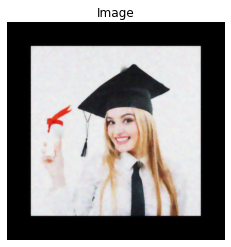

In [26]:
# Import the necessary modules
from skimage.restoration import denoise_tv_chambolle, inpaint
from skimage import transform

# Transform the image so it's not rotated
upright_img = transform.rotate(damaged_image, 20)

# Remove noise from the image, using the chambolle method
upright_img_without_noise = denoise_tv_chambolle(upright_img,weight=0.1, multichannel=True)

# Reconstruct the image missing parts
mask = get_mask(upright_img)
result = inpaint.inpaint_biharmonic(upright_img_without_noise, mask, multichannel=True)

show_image(result)